<a href="https://colab.research.google.com/github/Thanasak771/Thanasak771/blob/main/Thanasak_643040771_5_MIMO2x2_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#No.hidden layer 2
#Epoch 100
#Hidden layer activation function tanh
#leaning rate 0.001
#Output layer activation function linear
#Loss function MSE
#Optimizer SGD


import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from tensorflow.keras.callbacks import Callback

class BestLossTracker(Callback):
    def __init__(self):
        super().__init__()
        self.best_loss = float('inf')  # Initialize the best loss to infinity

    def on_epoch_end(self, epoch, logs=None):
        current_loss = logs.get('loss')
        if current_loss < self.best_loss:
            self.best_loss = current_loss
            print(f'New best loss at epoch {epoch }: {self.best_loss:.6f}')


# Number of transmissions
num_transmissions = 1000

# Mean and standard deviation for AWGN (assuming zero mean and unit variance)
noise_mean = 0
noise_std = 1

# Initialize lists to store training data (y) and corresponding labels (x)
y_data = []
x_data = []

# Total number of bits transmitted and errors for Zero Forcing
total_bits = 0
bit_errors_ZF = 0

# Perform transmissions
for i in range(num_transmissions):
    # Generate random Rayleigh fading matrix H (size 2x2)
    H = np.random.rayleigh(scale=1, size=(2, 2))

    # Generate random transmitted vector x (entries can be -1 or 1)
    x = np.random.choice([-1, 1], size=(2, 1))

    # Generate AWGN noise n (size 2x1)
    n = np.random.normal(loc=noise_mean, scale=noise_std, size=(2, 1))

    # Compute received vector y = Hx + n
    y = np.dot(H, x) + n

    # Zero Forcing: Compute the pseudo-inverse of H
    H_pseudo_inv = np.linalg.pinv(H)

    # Estimate x (ybar) using Zero Forcing: ybar = H_pseudo_inv * y
    ybar = np.dot(H_pseudo_inv, y)

    # Decide on transmitted values based on the sign of ybar
    x_hat_ZF = np.sign(ybar)

    # Compare ZF estimate with actual x to count bit errors
    bit_errors_in_transmission = np.sum(x != x_hat_ZF)
    bit_errors_ZF += bit_errors_in_transmission
    total_bits += len(x)

    # Collect y and corresponding x for neural network training
    y_data.append(y.flatten())  # Flatten y to store as a single feature vector
    x_data.append(x.flatten())  # Flatten x for regression prediction

# Convert lists to numpy arrays for neural network training
y_data = np.array(y_data)
x_data = np.array(x_data)

# Calculate BER for Zero Forcing
BER_ZF = bit_errors_ZF / total_bits
print(f"Total bit errors (ZF): {bit_errors_ZF}")
print(f"Final Bit Error Rate (ZF): {BER_ZF}")

# Split data into training and test sets for the neural network
X_train, X_test, y_train, y_test = train_test_split(y_data, x_data, test_size=0.2, random_state=42)

# Build the neural network using Keras
model = Sequential()

# First hidden layer with 'tanh' activation
model.add(Dense(16, input_dim=X_train.shape[1], activation='tanh'))
#---------------------------2

model.add(Dense(8, activation='tanh'))
model.add(Dense(8, activation='tanh'))




model.add(Dense(2, activation='linear'))


# Compile the model using Adam optimizer and mean squared error loss
model.compile(optimizer=SGD(learning_rate=0.001), loss='mean_squared_error')

# Train the model
#model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)
# Initialize a variable to track the best loss
best_loss = float('inf')

# Train the model and track the best loss manually
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)



best_loss = min(history.history['loss'])
print(f"Best Loss after training: {best_loss}")

# Predict on the test set
y_pred_NN = model.predict(X_test)

# Apply the threshold: if the result is greater than 0, it's bit 1; otherwise, bit -1
x_hat_NN = np.where(y_pred_NN > 0, 1, -1)

# Compare Neural Network predictions with actual test labels
bit_errors_NN = np.sum(x_hat_NN != y_test)

# Calculate the total number of bits in the test set
total_bits_test = np.prod(y_test.shape)

# Calculate BER for the neural network
BER_NN = bit_errors_NN / total_bits_test
print(f"Total bit errors (NN): {bit_errors_NN}")
print(f"Final Bit Error Rate (NN): {BER_NN}")

# Compare the accuracy of Zero Forcing and Neural Network
print(f"Bit Error Rate Comparison:\nZero Forcing BER: {BER_ZF}\nNeural Network BER: {BER_NN}")


Total bit errors (ZF): 575
Final Bit Error Rate (ZF): 0.2875
Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3527  
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1351 
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9436 
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8931 
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8022 
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7315  
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7254 
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6730 
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6782 
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6875 
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6414 
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6603
Epoch 13/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6699 
Epoch 14/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6

In [ ]:
#No.hidden layer 5
#Epoch 500
#Hidden layer activation function tanh
#leaning rate 0.001
#Output layer activation function linear
#Loss function MSE
#Optimizer SGD
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from tensorflow.keras.callbacks import Callback

class BestLossTracker(Callback):
    def __init__(self):
        super().__init__()
        self.best_loss = float('inf')  # Initialize the best loss to infinity

    def on_epoch_end(self, epoch, logs=None):
        current_loss = logs.get('loss')
        if current_loss < self.best_loss:
            self.best_loss = current_loss
            print(f'New best loss at epoch {epoch }: {self.best_loss:.6f}')


# Number of transmissions
num_transmissions = 1000

# Mean and standard deviation for AWGN (assuming zero mean and unit variance)
noise_mean = 0
noise_std = 1

# Initialize lists to store training data (y) and corresponding labels (x)
y_data = []
x_data = []

# Total number of bits transmitted and errors for Zero Forcing
total_bits = 0
bit_errors_ZF = 0

# Perform transmissions
for i in range(num_transmissions):
    # Generate random Rayleigh fading matrix H (size 2x2)
    H = np.random.rayleigh(scale=1, size=(2, 2))

    # Generate random transmitted vector x (entries can be -1 or 1)
    x = np.random.choice([-1, 1], size=(2, 1))

    # Generate AWGN noise n (size 2x1)
    n = np.random.normal(loc=noise_mean, scale=noise_std, size=(2, 1))

    # Compute received vector y = Hx + n
    y = np.dot(H, x) + n

    # Zero Forcing: Compute the pseudo-inverse of H
    H_pseudo_inv = np.linalg.pinv(H)

    # Estimate x (ybar) using Zero Forcing: ybar = H_pseudo_inv * y
    ybar = np.dot(H_pseudo_inv, y)

    # Decide on transmitted values based on the sign of ybar
    x_hat_ZF = np.sign(ybar)

    # Compare ZF estimate with actual x to count bit errors
    bit_errors_in_transmission = np.sum(x != x_hat_ZF)
    bit_errors_ZF += bit_errors_in_transmission
    total_bits += len(x)

    # Collect y and corresponding x for neural network training
    y_data.append(y.flatten())  # Flatten y to store as a single feature vector
    x_data.append(x.flatten())  # Flatten x for regression prediction

# Convert lists to numpy arrays for neural network training
y_data = np.array(y_data)
x_data = np.array(x_data)

# Calculate BER for Zero Forcing
BER_ZF = bit_errors_ZF / total_bits
print(f"Total bit errors (ZF): {bit_errors_ZF}")
print(f"Final Bit Error Rate (ZF): {BER_ZF}")

# Split data into training and test sets for the neural network
X_train, X_test, y_train, y_test = train_test_split(y_data, x_data, test_size=0.2, random_state=42)

# Build the neural network using Keras
model = Sequential()

# First hidden layer with 'tanh' activation
model.add(Dense(16, input_dim=X_train.shape[1], activation='tanh'))
#---------------------------2

model.add(Dense(64, activation='tanh'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(16, activation='tanh'))
model.add(Dense(16, activation='tanh'))
model.add(Dense(16, activation='tanh'))




model.add(Dense(2, activation='linear'))


# Compile the model using Adam optimizer and mean squared error loss
model.compile(optimizer=SGD(learning_rate=0.001), loss='mean_squared_error')

# Train the model
#model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)
# Initialize a variable to track the best loss
best_loss = float('inf')

# Train the model and track the best loss manually
history = model.fit(X_train, y_train, epochs=500, batch_size=128, verbose=1)



best_loss = min(history.history['loss'])
print(f"Best Loss after training: {best_loss}")

# Predict on the test set
y_pred_NN = model.predict(X_test)

# Apply the threshold: if the result is greater than 0, it's bit 1; otherwise, bit -1
x_hat_NN = np.where(y_pred_NN > 0, 1, -1)

# Compare Neural Network predictions with actual test labels
bit_errors_NN = np.sum(x_hat_NN != y_test)

# Calculate the total number of bits in the test set
total_bits_test = np.prod(y_test.shape)

# Calculate BER for the neural network
BER_NN = bit_errors_NN / total_bits_test
print(f"Total bit errors (NN): {bit_errors_NN}")
print(f"Final Bit Error Rate (NN): {BER_NN}")

# Compare the accuracy of Zero Forcing and Neural Network
print(f"Bit Error Rate Comparison:\nZero Forcing BER: {BER_ZF}\nNeural Network BER: {BER_NN}")

Total bit errors (ZF): 566
Final Bit Error Rate (ZF): 0.283
Epoch 1/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2556  
Epoch 2/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1448 
Epoch 3/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0284 
Epoch 4/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9493 
Epoch 5/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8791 
Epoch 6/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8319 
Epoch 7/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8026 
Epoch 8/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7551 
Epoch 9/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7446 
Epoch 10/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7281 
Epoch 11/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7133 
Epoch 12/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7010 
Epoch 13/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7100 
Epoch 14/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6927 
Epoch 15/500
7/7 ━━━━━━━

In [ ]:
#No.hidden layer 5
#Epoch 500
#Hidden layer activation function relu
#leaning rate 0.001
#Output layer activation function linear
#Loss function MSE
#Optimizer SGD
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense , LeakyReLU
from keras.optimizers import SGD
from tensorflow.keras.callbacks import Callback

class BestLossTracker(Callback):
    def __init__(self):
        super().__init__()
        self.best_loss = float('inf')  # Initialize the best loss to infinity

    def on_epoch_end(self, epoch, logs=None):
        current_loss = logs.get('loss')
        if current_loss < self.best_loss:
            self.best_loss = current_loss
            print(f'New best loss at epoch {epoch }: {self.best_loss:.6f}')


# Number of transmissions
num_transmissions = 1000

# Mean and standard deviation for AWGN (assuming zero mean and unit variance)
noise_mean = 0
noise_std = 1

# Initialize lists to store training data (y) and corresponding labels (x)
y_data = []
x_data = []

# Total number of bits transmitted and errors for Zero Forcing
total_bits = 0
bit_errors_ZF = 0

# Perform transmissions
for i in range(num_transmissions):
    # Generate random Rayleigh fading matrix H (size 2x2)
    H = np.random.rayleigh(scale=1, size=(2, 2))

    # Generate random transmitted vector x (entries can be -1 or 1)
    x = np.random.choice([-1, 1], size=(2, 1))

    # Generate AWGN noise n (size 2x1)
    n = np.random.normal(loc=noise_mean, scale=noise_std, size=(2, 1))

    # Compute received vector y = Hx + n
    y = np.dot(H, x) + n

    # Zero Forcing: Compute the pseudo-inverse of H
    H_pseudo_inv = np.linalg.pinv(H)

    # Estimate x (ybar) using Zero Forcing: ybar = H_pseudo_inv * y
    ybar = np.dot(H_pseudo_inv, y)

    # Decide on transmitted values based on the sign of ybar
    x_hat_ZF = np.sign(ybar)

    # Compare ZF estimate with actual x to count bit errors
    bit_errors_in_transmission = np.sum(x != x_hat_ZF)
    bit_errors_ZF += bit_errors_in_transmission
    total_bits += len(x)

    # Collect y and corresponding x for neural network training
    y_data.append(y.flatten())  # Flatten y to store as a single feature vector
    x_data.append(x.flatten())  # Flatten x for regression prediction

# Convert lists to numpy arrays for neural network training
y_data = np.array(y_data)
x_data = np.array(x_data)

# Calculate BER for Zero Forcing
BER_ZF = bit_errors_ZF / total_bits
print(f"Total bit errors (ZF): {bit_errors_ZF}")
print(f"Final Bit Error Rate (ZF): {BER_ZF}")

# Split data into training and test sets for the neural network
X_train, X_test, y_train, y_test = train_test_split(y_data, x_data, test_size=0.2, random_state=42)

# Build the neural network using Keras
model = Sequential()

# First hidden layer with 'tanh' activation
model.add(Dense(16, input_dim=X_train.shape[1], activation='tanh'))
#---------------------------2

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))




model.add(Dense(2, activation='linear'))


# Compile the model using Adam optimizer and mean squared error loss
model.compile(optimizer=SGD(learning_rate=0.001), loss='mean_squared_error')

# Train the model
#model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)
# Initialize a variable to track the best loss
best_loss = float('inf')

# Train the model and track the best loss manually
history = model.fit(X_train, y_train, epochs=500, batch_size=128, verbose=1)



best_loss = min(history.history['loss'])
print(f"Best Loss after training: {best_loss}")

# Predict on the test set
y_pred_NN = model.predict(X_test)

# Apply the threshold: if the result is greater than 0, it's bit 1; otherwise, bit -1
x_hat_NN = np.where(y_pred_NN > 0, 1, -1)

# Compare Neural Network predictions with actual test labels
bit_errors_NN = np.sum(x_hat_NN != y_test)

# Calculate the total number of bits in the test set
total_bits_test = np.prod(y_test.shape)

# Calculate BER for the neural network
BER_NN = bit_errors_NN / total_bits_test
print(f"Total bit errors (NN): {bit_errors_NN}")
print(f"Final Bit Error Rate (NN): {BER_NN}")

# Compare the accuracy of Zero Forcing and Neural Network
print(f"Bit Error Rate Comparison:\nZero Forcing BER: {BER_ZF}\nNeural Network BER: {BER_NN}")

Total bit errors (ZF): 570
Final Bit Error Rate (ZF): 0.285
Epoch 1/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0169  
Epoch 2/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0099 
Epoch 3/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0114 
Epoch 4/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0047 
Epoch 5/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9913 
Epoch 6/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9902 
Epoch 7/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9816 
Epoch 8/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9802 
Epoch 9/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9692 
Epoch 10/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9625 
Epoch 11/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9597 
Epoch 12/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9522 
Epoch 13/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9493 
Epoch 14/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9464 
Epoch 15/500
7/7 ━━━━━━━

In [ ]:
#No.hidden layer 5
#Epoch 500
#Hidden layer activation function LeakyRELU
#leaning rate 0.001
#Output layer activation function linear
#Loss function MSE
#Optimizer SGD
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense , LeakyReLU
from keras.optimizers import SGD
from tensorflow.keras.callbacks import Callback

class BestLossTracker(Callback):
    def __init__(self):
        super().__init__()
        self.best_loss = float('inf')  # Initialize the best loss to infinity

    def on_epoch_end(self, epoch, logs=None):
        current_loss = logs.get('loss')
        if current_loss < self.best_loss:
            self.best_loss = current_loss
            print(f'New best loss at epoch {epoch }: {self.best_loss:.6f}')


# Number of transmissions
num_transmissions = 1000

# Mean and standard deviation for AWGN (assuming zero mean and unit variance)
noise_mean = 0
noise_std = 1

# Initialize lists to store training data (y) and corresponding labels (x)
y_data = []
x_data = []

# Total number of bits transmitted and errors for Zero Forcing
total_bits = 0
bit_errors_ZF = 0

# Perform transmissions
for i in range(num_transmissions):
    # Generate random Rayleigh fading matrix H (size 2x2)
    H = np.random.rayleigh(scale=1, size=(2, 2))

    # Generate random transmitted vector x (entries can be -1 or 1)
    x = np.random.choice([-1, 1], size=(2, 1))

    # Generate AWGN noise n (size 2x1)
    n = np.random.normal(loc=noise_mean, scale=noise_std, size=(2, 1))

    # Compute received vector y = Hx + n
    y = np.dot(H, x) + n

    # Zero Forcing: Compute the pseudo-inverse of H
    H_pseudo_inv = np.linalg.pinv(H)

    # Estimate x (ybar) using Zero Forcing: ybar = H_pseudo_inv * y
    ybar = np.dot(H_pseudo_inv, y)

    # Decide on transmitted values based on the sign of ybar
    x_hat_ZF = np.sign(ybar)

    # Compare ZF estimate with actual x to count bit errors
    bit_errors_in_transmission = np.sum(x != x_hat_ZF)
    bit_errors_ZF += bit_errors_in_transmission
    total_bits += len(x)

    # Collect y and corresponding x for neural network training
    y_data.append(y.flatten())  # Flatten y to store as a single feature vector
    x_data.append(x.flatten())  # Flatten x for regression prediction

# Convert lists to numpy arrays for neural network training
y_data = np.array(y_data)
x_data = np.array(x_data)

# Calculate BER for Zero Forcing
BER_ZF = bit_errors_ZF / total_bits
print(f"Total bit errors (ZF): {bit_errors_ZF}")
print(f"Final Bit Error Rate (ZF): {BER_ZF}")

# Split data into training and test sets for the neural network
X_train, X_test, y_train, y_test = train_test_split(y_data, x_data, test_size=0.2, random_state=42)

# Build the neural network using Keras
model = Sequential()

# First hidden layer with 'tanh' activation
model.add(Dense(16, input_dim=X_train.shape[1], activation='tanh'))
#---------------------------2

model.add(Dense(128))
model.add(LeakyReLU(alpha=0.01))

model.add(Dense(64))
model.add(LeakyReLU(alpha=0.01))

model.add(Dense(64))
model.add(LeakyReLU(alpha=0.01))

model.add(Dense(32))
model.add(LeakyReLU(alpha=0.01))

model.add(Dense(32))
model.add(LeakyReLU(alpha=0.01))




model.add(Dense(2, activation='linear'))


# Compile the model using Adam optimizer and mean squared error loss
model.compile(optimizer=SGD(learning_rate=0.001), loss='mean_squared_error')

# Train the model
#model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)
# Initialize a variable to track the best loss
best_loss = float('inf')

# Train the model and track the best loss manually
history = model.fit(X_train, y_train, epochs=500, batch_size=128, verbose=1)



best_loss = min(history.history['loss'])
print(f"Best Loss after training: {best_loss}")

# Predict on the test set
y_pred_NN = model.predict(X_test)

# Apply the threshold: if the result is greater than 0, it's bit 1; otherwise, bit -1
x_hat_NN = np.where(y_pred_NN > 0, 1, -1)

# Compare Neural Network predictions with actual test labels
bit_errors_NN = np.sum(x_hat_NN != y_test)

# Calculate the total number of bits in the test set
total_bits_test = np.prod(y_test.shape)

# Calculate BER for the neural network
BER_NN = bit_errors_NN / total_bits_test
print(f"Total bit errors (NN): {bit_errors_NN}")
print(f"Final Bit Error Rate (NN): {BER_NN}")

# Compare the accuracy of Zero Forcing and Neural Network
print(f"Bit Error Rate Comparison:\nZero Forcing BER: {BER_ZF}\nNeural Network BER: {BER_NN}")

Total bit errors (ZF): 572
Final Bit Error Rate (ZF): 0.286
Epoch 1/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0031  
Epoch 2/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0149 
Epoch 3/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0075 
Epoch 4/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0061 
Epoch 5/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0050 
Epoch 6/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9971 
Epoch 7/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0015 
Epoch 8/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9888 
Epoch 9/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9963 
Epoch 10/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9832 
Epoch 11/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9804 
Epoch 12/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9818 
Epoch 13/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9806 
Epoch 14/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9707 
Epoch 15/500
7/7 ━━━━━━━

In [ ]:
#No.hidden layer 5
#Epoch 500
#Hidden layer activation function LeakyRELU
#leaning rate 0.01
#Output layer activation function sigmoid
#Loss function MSE
#Optimizer SGD
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense , LeakyReLU
from keras.optimizers import SGD
from tensorflow.keras.callbacks import Callback

class BestLossTracker(Callback):
    def __init__(self):
        super().__init__()
        self.best_loss = float('inf')  # Initialize the best loss to infinity

    def on_epoch_end(self, epoch, logs=None):
        current_loss = logs.get('loss')
        if current_loss < self.best_loss:
            self.best_loss = current_loss
            print(f'New best loss at epoch {epoch }: {self.best_loss:.6f}')


# Number of transmissions
num_transmissions = 1000

# Mean and standard deviation for AWGN (assuming zero mean and unit variance)
noise_mean = 0
noise_std = 1

# Initialize lists to store training data (y) and corresponding labels (x)
y_data = []
x_data = []

# Total number of bits transmitted and errors for Zero Forcing
total_bits = 0
bit_errors_ZF = 0

# Perform transmissions
for i in range(num_transmissions):
    # Generate random Rayleigh fading matrix H (size 2x2)
    H = np.random.rayleigh(scale=1, size=(2, 2))

    # Generate random transmitted vector x (entries can be -1 or 1)
    x = np.random.choice([-1, 1], size=(2, 1))

    # Generate AWGN noise n (size 2x1)
    n = np.random.normal(loc=noise_mean, scale=noise_std, size=(2, 1))

    # Compute received vector y = Hx + n
    y = np.dot(H, x) + n

    # Zero Forcing: Compute the pseudo-inverse of H
    H_pseudo_inv = np.linalg.pinv(H)

    # Estimate x (ybar) using Zero Forcing: ybar = H_pseudo_inv * y
    ybar = np.dot(H_pseudo_inv, y)

    # Decide on transmitted values based on the sign of ybar
    x_hat_ZF = np.sign(ybar)

    # Compare ZF estimate with actual x to count bit errors
    bit_errors_in_transmission = np.sum(x != x_hat_ZF)
    bit_errors_ZF += bit_errors_in_transmission
    total_bits += len(x)

    # Collect y and corresponding x for neural network training
    y_data.append(y.flatten())  # Flatten y to store as a single feature vector
    x_data.append(x.flatten())  # Flatten x for regression prediction

# Convert lists to numpy arrays for neural network training
y_data = np.array(y_data)
x_data = np.array(x_data)

# Calculate BER for Zero Forcing
BER_ZF = bit_errors_ZF / total_bits
print(f"Total bit errors (ZF): {bit_errors_ZF}")
print(f"Final Bit Error Rate (ZF): {BER_ZF}")

# Split data into training and test sets for the neural network
X_train, X_test, y_train, y_test = train_test_split(y_data, x_data, test_size=0.2, random_state=42)

# Build the neural network using Keras
model = Sequential()

# First hidden layer with 'tanh' activation
model.add(Dense(16, input_dim=X_train.shape[1], activation='tanh'))
#---------------------------2

model.add(Dense(128))
model.add(LeakyReLU(alpha=0.01))

model.add(Dense(64))
model.add(LeakyReLU(alpha=0.01))

model.add(Dense(64))
model.add(LeakyReLU(alpha=0.01))

model.add(Dense(32))
model.add(LeakyReLU(alpha=0.01))

model.add(Dense(32))
model.add(LeakyReLU(alpha=0.01))




model.add(Dense(2, activation='sigmoid'))


# Compile the model using Adam optimizer and mean squared error loss
model.compile(optimizer=SGD(learning_rate=0.01), loss='mean_squared_error')

# Train the model
#model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)
# Initialize a variable to track the best loss
best_loss = float('inf')

# Train the model and track the best loss manually
history = model.fit(X_train, y_train, epochs=500, batch_size=256, verbose=1)



best_loss = min(history.history['loss'])
print(f"Best Loss after training: {best_loss}")

# Predict on the test set
y_pred_NN = model.predict(X_test)

# Apply the threshold: if the result is greater than 0, it's bit 1; otherwise, bit -1
x_hat_NN = np.where(y_pred_NN > 0, 1, -1)

# Compare Neural Network predictions with actual test labels
bit_errors_NN = np.sum(x_hat_NN != y_test)

# Calculate the total number of bits in the test set
total_bits_test = np.prod(y_test.shape)

# Calculate BER for the neural network
BER_NN = bit_errors_NN / total_bits_test
print(f"Total bit errors (NN): {bit_errors_NN}")
print(f"Final Bit Error Rate (NN): {BER_NN}")

# Compare the accuracy of Zero Forcing and Neural Network
print(f"Bit Error Rate Comparison:\nZero Forcing BER: {BER_ZF}\nNeural Network BER: {BER_NN}")

Total bit errors (ZF): 529
Final Bit Error Rate (ZF): 0.2645
Epoch 1/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.3120  
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2941 
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2943 
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2926 
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2937 
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2884 
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2749 
Epoch 8/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2785 
Epoch 9/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2818 
Epoch 10/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2664 
Epoch 11/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2642 
Epoch 12/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2606 
Epoch 13/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2677 
Epoch 14/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2570 
Epoch 15/500
4/4 ━━━━━━

In [ ]:

#No.hidden layer 5
#Epoch 500
#Hidden layer activation function LeakyRELU
#leaning rate 0.001
#Output layer activation function sigmoid
#Loss function binary crossentropy
#Optimizer SGD
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense , LeakyReLU
from keras.optimizers import SGD , Adam
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.losses import BinaryFocalCrossentropy

class BestLossTracker(Callback):
    def __init__(self):
        super().__init__()
        self.best_loss = float('inf')  # Initialize the best loss to infinity

    def on_epoch_end(self, epoch, logs=None):
        current_loss = logs.get('loss')
        if current_loss < self.best_loss:
            self.best_loss = current_loss
            print(f'New best loss at epoch {epoch }: {self.best_loss:.6f}')


# Number of transmissions
num_transmissions = 1000

# Mean and standard deviation for AWGN (assuming zero mean and unit variance)
noise_mean = 0
noise_std = 1

# Initialize lists to store training data (y) and corresponding labels (x)
y_data = []
x_data = []

# Total number of bits transmitted and errors for Zero Forcing
total_bits = 0
bit_errors_ZF = 0

# Perform transmissions
for i in range(num_transmissions):
    # Generate random Rayleigh fading matrix H (size 2x2)
    H = np.random.rayleigh(scale=1, size=(2, 2))

    # Generate random transmitted vector x (entries can be -1 or 1)
    x = np.random.choice([-1, 1], size=(2, 1))

    # Generate AWGN noise n (size 2x1)
    n = np.random.normal(loc=noise_mean, scale=noise_std, size=(2, 1))

    # Compute received vector y = Hx + n
    y = np.dot(H, x) + n

    # Zero Forcing: Compute the pseudo-inverse of H
    H_pseudo_inv = np.linalg.pinv(H)

    # Estimate x (ybar) using Zero Forcing: ybar = H_pseudo_inv * y
    ybar = np.dot(H_pseudo_inv, y)

    # Decide on transmitted values based on the sign of ybar
    x_hat_ZF = np.sign(ybar)

    # Compare ZF estimate with actual x to count bit errors
    bit_errors_in_transmission = np.sum(x != x_hat_ZF)
    bit_errors_ZF += bit_errors_in_transmission
    total_bits += len(x)

    # Collect y and corresponding x for neural network training
    y_data.append(y.flatten())  # Flatten y to store as a single feature vector
    x_data.append(x.flatten())  # Flatten x for regression prediction

# Convert lists to numpy arrays for neural network training
y_data = np.array(y_data)
x_data = np.array(x_data)

# Calculate BER for Zero Forcing
BER_ZF = bit_errors_ZF / total_bits
print(f"Total bit errors (ZF): {bit_errors_ZF}")
print(f"Final Bit Error Rate (ZF): {BER_ZF}")

# Split data into training and test sets for the neural network
X_train, X_test, y_train, y_test = train_test_split(y_data, x_data, test_size=0.2, random_state=42)

# Build the neural network using Keras
model = Sequential()

# First hidden layer with 'tanh' activation
model.add(Dense(16, input_dim=X_train.shape[1], activation='tanh'))
#---------------------------2

model.add(Dense(128))
model.add(LeakyReLU(alpha=0.01))

model.add(Dense(64))
model.add(LeakyReLU(alpha=0.01))

model.add(Dense(64))
model.add(LeakyReLU(alpha=0.01))

model.add(Dense(32))
model.add(LeakyReLU(alpha=0.01))

model.add(Dense(32))
model.add(LeakyReLU(alpha=0.01))




model.add(Dense(2, activation='sigmoid'))


# Compile the model using Adam optimizer and mean squared error loss
model.compile(optimizer=SGD(learning_rate=0.001), loss='binary_crossentropy')

# Train the model
#model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)
# Initialize a variable to track the best loss
best_loss = float('inf')

# Train the model and track the best loss manually
history = model.fit(X_train, y_train, epochs=500, batch_size=256, verbose=1)



best_loss = min(history.history['loss'])
print(f"Best Loss after training: {best_loss}")

# Predict on the test set
y_pred_NN = model.predict(X_test)

# Apply the threshold: if the result is greater than 0, it's bit 1; otherwise, bit -1
x_hat_NN = np.where(y_pred_NN > 0, 1, -1)

# Compare Neural Network predictions with actual test labels
bit_errors_NN = np.sum(x_hat_NN != y_test)

# Calculate the total number of bits in the test set
total_bits_test = np.prod(y_test.shape)

# Calculate BER for the neural network
BER_NN = bit_errors_NN / total_bits_test
print(f"Total bit errors (NN): {bit_errors_NN}")
print(f"Final Bit Error Rate (NN): {BER_NN}")

# Compare the accuracy of Zero Forcing and Neural Network
print(f"Bit Error Rate Comparison:\nZero Forcing BER: {BER_ZF}\nNeural Network BER: {BER_NN}")

Total bit errors (ZF): 550
Final Bit Error Rate (ZF): 0.275
Epoch 1/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6565  
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6538 
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6530 
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6505 
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6466 
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6459 
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6424 
Epoch 8/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6440 
Epoch 9/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6384 
Epoch 10/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6359 
Epoch 11/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6331 
Epoch 12/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6340 
Epoch 13/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6305 
Epoch 14/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6276 
Epoch 15/500
4/4 ━━━━━━━

In [ ]:
#No.hidden layer 5
#Epoch 500
#Hidden layer activation function LeakyRELU
#leaning rate 0.001
#Output layer activation function sigmoid
#Loss function BinaryFocalCrossentropy
#Optimizer SGD
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense , LeakyReLU
from keras.optimizers import SGD , Adam
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.losses import BinaryFocalCrossentropy

class BestLossTracker(Callback):
    def __init__(self):
        super().__init__()
        self.best_loss = float('inf')  # Initialize the best loss to infinity

    def on_epoch_end(self, epoch, logs=None):
        current_loss = logs.get('loss')
        if current_loss < self.best_loss:
            self.best_loss = current_loss
            print(f'New best loss at epoch {epoch }: {self.best_loss:.6f}')


# Number of transmissions
num_transmissions = 1000

# Mean and standard deviation for AWGN (assuming zero mean and unit variance)
noise_mean = 0
noise_std = 1

# Initialize lists to store training data (y) and corresponding labels (x)
y_data = []
x_data = []

# Total number of bits transmitted and errors for Zero Forcing
total_bits = 0
bit_errors_ZF = 0

# Perform transmissions
for i in range(num_transmissions):
    # Generate random Rayleigh fading matrix H (size 2x2)
    H = np.random.rayleigh(scale=1, size=(2, 2))

    # Generate random transmitted vector x (entries can be -1 or 1)
    x = np.random.choice([-1, 1], size=(2, 1))

    # Generate AWGN noise n (size 2x1)
    n = np.random.normal(loc=noise_mean, scale=noise_std, size=(2, 1))

    # Compute received vector y = Hx + n
    y = np.dot(H, x) + n

    # Zero Forcing: Compute the pseudo-inverse of H
    H_pseudo_inv = np.linalg.pinv(H)

    # Estimate x (ybar) using Zero Forcing: ybar = H_pseudo_inv * y
    ybar = np.dot(H_pseudo_inv, y)

    # Decide on transmitted values based on the sign of ybar
    x_hat_ZF = np.sign(ybar)

    # Compare ZF estimate with actual x to count bit errors
    bit_errors_in_transmission = np.sum(x != x_hat_ZF)
    bit_errors_ZF += bit_errors_in_transmission
    total_bits += len(x)

    # Collect y and corresponding x for neural network training
    y_data.append(y.flatten())  # Flatten y to store as a single feature vector
    x_data.append(x.flatten())  # Flatten x for regression prediction

# Convert lists to numpy arrays for neural network training
y_data = np.array(y_data)
x_data = np.array(x_data)

# Calculate BER for Zero Forcing
BER_ZF = bit_errors_ZF / total_bits
print(f"Total bit errors (ZF): {bit_errors_ZF}")
print(f"Final Bit Error Rate (ZF): {BER_ZF}")

# Split data into training and test sets for the neural network
X_train, X_test, y_train, y_test = train_test_split(y_data, x_data, test_size=0.2, random_state=42)

# Build the neural network using Keras
model = Sequential()

# First hidden layer with 'tanh' activation
model.add(Dense(16, input_dim=X_train.shape[1], activation='tanh'))
#---------------------------2

model.add(Dense(128))
model.add(LeakyReLU(alpha=0.01))

model.add(Dense(64))
model.add(LeakyReLU(alpha=0.01))

model.add(Dense(64))
model.add(LeakyReLU(alpha=0.01))

model.add(Dense(32))
model.add(LeakyReLU(alpha=0.01))

model.add(Dense(32))
model.add(LeakyReLU(alpha=0.01))




model.add(Dense(2, activation='sigmoid'))


# Compile the model using Adam optimizer and mean squared error loss
model.compile(optimizer=SGD(learning_rate=0.001), loss=BinaryFocalCrossentropy(gamma=2.0, from_logits=False))

# Train the model
#model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)
# Initialize a variable to track the best loss
best_loss = float('inf')

# Train the model and track the best loss manually
history = model.fit(X_train, y_train, epochs=500, batch_size=256, verbose=1)



best_loss = min(history.history['loss'])
print(f"Best Loss after training: {best_loss}")

# Predict on the test set
y_pred_NN = model.predict(X_test)

# Apply the threshold: if the result is greater than 0, it's bit 1; otherwise, bit -1
x_hat_NN = np.where(y_pred_NN > 0, 1, -1)

# Compare Neural Network predictions with actual test labels
bit_errors_NN = np.sum(x_hat_NN != y_test)

# Calculate the total number of bits in the test set
total_bits_test = np.prod(y_test.shape)

# Calculate BER for the neural network
BER_NN = bit_errors_NN / total_bits_test
print(f"Total bit errors (NN): {bit_errors_NN}")
print(f"Final Bit Error Rate (NN): {BER_NN}")

# Compare the accuracy of Zero Forcing and Neural Network
print(f"Bit Error Rate Comparison:\nZero Forcing BER: {BER_ZF}\nNeural Network BER: {BER_NN}")

Total bit errors (ZF): 555
Final Bit Error Rate (ZF): 0.2775
Epoch 1/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1673  
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1679 
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1659 
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1668 
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1660 
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1655 
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1660 
Epoch 8/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1650 
Epoch 9/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1657 
Epoch 10/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1647 
Epoch 11/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1642 
Epoch 12/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1646 
Epoch 13/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1637 
Epoch 14/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1649 
Epoch 15/500
4/4 ━━━━━━

In [ ]:
#No.hidden layer 5
#Epoch 500
#Hidden layer activation function LeakyRELU
#leaning rate 0.001
#Output layer activation function sigmoid
#Loss function BinaryFocalCrossentropy
#Optimizer Adam
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense , LeakyReLU
from keras.optimizers import SGD , Adam
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.losses import BinaryFocalCrossentropy

class BestLossTracker(Callback):
    def __init__(self):
        super().__init__()
        self.best_loss = float('inf')  # Initialize the best loss to infinity

    def on_epoch_end(self, epoch, logs=None):
        current_loss = logs.get('loss')
        if current_loss < self.best_loss:
            self.best_loss = current_loss
            print(f'New best loss at epoch {epoch }: {self.best_loss:.6f}')


# Number of transmissions
num_transmissions = 1000

# Mean and standard deviation for AWGN (assuming zero mean and unit variance)
noise_mean = 0
noise_std = 1

# Initialize lists to store training data (y) and corresponding labels (x)
y_data = []
x_data = []

# Total number of bits transmitted and errors for Zero Forcing
total_bits = 0
bit_errors_ZF = 0

# Perform transmissions
for i in range(num_transmissions):
    # Generate random Rayleigh fading matrix H (size 2x2)
    H = np.random.rayleigh(scale=1, size=(2, 2))

    # Generate random transmitted vector x (entries can be -1 or 1)
    x = np.random.choice([-1, 1], size=(2, 1))

    # Generate AWGN noise n (size 2x1)
    n = np.random.normal(loc=noise_mean, scale=noise_std, size=(2, 1))

    # Compute received vector y = Hx + n
    y = np.dot(H, x) + n

    # Zero Forcing: Compute the pseudo-inverse of H
    H_pseudo_inv = np.linalg.pinv(H)

    # Estimate x (ybar) using Zero Forcing: ybar = H_pseudo_inv * y
    ybar = np.dot(H_pseudo_inv, y)

    # Decide on transmitted values based on the sign of ybar
    x_hat_ZF = np.sign(ybar)

    # Compare ZF estimate with actual x to count bit errors
    bit_errors_in_transmission = np.sum(x != x_hat_ZF)
    bit_errors_ZF += bit_errors_in_transmission
    total_bits += len(x)

    # Collect y and corresponding x for neural network training
    y_data.append(y.flatten())  # Flatten y to store as a single feature vector
    x_data.append(x.flatten())  # Flatten x for regression prediction

# Convert lists to numpy arrays for neural network training
y_data = np.array(y_data)
x_data = np.array(x_data)

# Calculate BER for Zero Forcing
BER_ZF = bit_errors_ZF / total_bits
print(f"Total bit errors (ZF): {bit_errors_ZF}")
print(f"Final Bit Error Rate (ZF): {BER_ZF}")

# Split data into training and test sets for the neural network
X_train, X_test, y_train, y_test = train_test_split(y_data, x_data, test_size=0.2, random_state=42)

# Build the neural network using Keras
model = Sequential()

# First hidden layer with 'tanh' activation
model.add(Dense(16, input_dim=X_train.shape[1], activation='tanh'))
#---------------------------2

model.add(Dense(128))
model.add(LeakyReLU(alpha=0.01))

model.add(Dense(64))
model.add(LeakyReLU(alpha=0.01))

model.add(Dense(64))
model.add(LeakyReLU(alpha=0.01))

model.add(Dense(32))
model.add(LeakyReLU(alpha=0.01))

model.add(Dense(32))
model.add(LeakyReLU(alpha=0.01))




model.add(Dense(2, activation='sigmoid'))


# Compile the model using Adam optimizer and mean squared error loss
model.compile(optimizer=Adam(learning_rate=0.001), loss=BinaryFocalCrossentropy(gamma=2.0, from_logits=False))

# Train the model
#model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)
# Initialize a variable to track the best loss
best_loss = float('inf')

# Train the model and track the best loss manually
history = model.fit(X_train, y_train, epochs=500, batch_size=256, verbose=1)



best_loss = min(history.history['loss'])
print(f"Best Loss after training: {best_loss}")

# Predict on the test set
y_pred_NN = model.predict(X_test)

# Apply the threshold: if the result is greater than 0, it's bit 1; otherwise, bit -1
x_hat_NN = np.where(y_pred_NN > 0, 1, -1)

# Compare Neural Network predictions with actual test labels
bit_errors_NN = np.sum(x_hat_NN != y_test)

# Calculate the total number of bits in the test set
total_bits_test = np.prod(y_test.shape)

# Calculate BER for the neural network
BER_NN = bit_errors_NN / total_bits_test
print(f"Total bit errors (NN): {bit_errors_NN}")
print(f"Final Bit Error Rate (NN): {BER_NN}")

# Compare the accuracy of Zero Forcing and Neural Network
print(f"Bit Error Rate Comparison:\nZero Forcing BER: {BER_ZF}\nNeural Network BER: {BER_NN}")

Total bit errors (ZF): 572
Final Bit Error Rate (ZF): 0.286
Epoch 1/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1478
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1169  
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1093  
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1103  
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1070  
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1056 
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1031 
Epoch 8/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1060 
Epoch 9/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1049
Epoch 10/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1052  
Epoch 11/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1020 
Epoch 12/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1018 
Epoch 13/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1012 
Epoch 14/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1009 
Epoch 15/500
4/4 ━━━━

In [ ]:
#No.hidden layer 5
#Epoch 500
#Hidden layer activation function LeakyRELU
#leaning rate 0.0001
#Output layer activation function sigmoid
#Loss function BinaryFocalCrossentropy
#Optimizer Adam
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense , LeakyReLU
from keras.optimizers import SGD , Adam
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.losses import BinaryFocalCrossentropy

class BestLossTracker(Callback):
    def __init__(self):
        super().__init__()
        self.best_loss = float('inf')  # Initialize the best loss to infinity

    def on_epoch_end(self, epoch, logs=None):
        current_loss = logs.get('loss')
        if current_loss < self.best_loss:
            self.best_loss = current_loss
            print(f'New best loss at epoch {epoch }: {self.best_loss:.6f}')


# Number of transmissions
num_transmissions = 1000

# Mean and standard deviation for AWGN (assuming zero mean and unit variance)
noise_mean = 0
noise_std = 1

# Initialize lists to store training data (y) and corresponding labels (x)
y_data = []
x_data = []

# Total number of bits transmitted and errors for Zero Forcing
total_bits = 0
bit_errors_ZF = 0

# Perform transmissions
for i in range(num_transmissions):
    # Generate random Rayleigh fading matrix H (size 2x2)
    H = np.random.rayleigh(scale=1, size=(2, 2))

    # Generate random transmitted vector x (entries can be -1 or 1)
    x = np.random.choice([-1, 1], size=(2, 1))

    # Generate AWGN noise n (size 2x1)
    n = np.random.normal(loc=noise_mean, scale=noise_std, size=(2, 1))

    # Compute received vector y = Hx + n
    y = np.dot(H, x) + n

    # Zero Forcing: Compute the pseudo-inverse of H
    H_pseudo_inv = np.linalg.pinv(H)

    # Estimate x (ybar) using Zero Forcing: ybar = H_pseudo_inv * y
    ybar = np.dot(H_pseudo_inv, y)

    # Decide on transmitted values based on the sign of ybar
    x_hat_ZF = np.sign(ybar)

    # Compare ZF estimate with actual x to count bit errors
    bit_errors_in_transmission = np.sum(x != x_hat_ZF)
    bit_errors_ZF += bit_errors_in_transmission
    total_bits += len(x)

    # Collect y and corresponding x for neural network training
    y_data.append(y.flatten())  # Flatten y to store as a single feature vector
    x_data.append(x.flatten())  # Flatten x for regression prediction

# Convert lists to numpy arrays for neural network training
y_data = np.array(y_data)
x_data = np.array(x_data)

# Calculate BER for Zero Forcing
BER_ZF = bit_errors_ZF / total_bits
print(f"Total bit errors (ZF): {bit_errors_ZF}")
print(f"Final Bit Error Rate (ZF): {BER_ZF}")

# Split data into training and test sets for the neural network
X_train, X_test, y_train, y_test = train_test_split(y_data, x_data, test_size=0.2, random_state=42)

# Build the neural network using Keras
model = Sequential()

# First hidden layer with 'tanh' activation
model.add(Dense(16, input_dim=X_train.shape[1], activation='tanh'))
#---------------------------2

model.add(Dense(128))
model.add(LeakyReLU(alpha=0.01))

model.add(Dense(64))
model.add(LeakyReLU(alpha=0.01))

model.add(Dense(64))
model.add(LeakyReLU(alpha=0.01))

model.add(Dense(32))
model.add(LeakyReLU(alpha=0.01))

model.add(Dense(32))
model.add(LeakyReLU(alpha=0.01))




model.add(Dense(2, activation='sigmoid'))


# Compile the model using Adam optimizer and mean squared error loss
model.compile(optimizer=Adam(learning_rate=0.0001), loss=BinaryFocalCrossentropy(gamma=2.0, from_logits=False))

# Train the model
#model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)
# Initialize a variable to track the best loss
best_loss = float('inf')

# Train the model and track the best loss manually
history = model.fit(X_train, y_train, epochs=500, batch_size=256, verbose=1)



best_loss = min(history.history['loss'])
print(f"Best Loss after training: {best_loss}")

# Predict on the test set
y_pred_NN = model.predict(X_test)

# Apply the threshold: if the result is greater than 0, it's bit 1; otherwise, bit -1
x_hat_NN = np.where(y_pred_NN > 0, 1, -1)

# Compare Neural Network predictions with actual test labels
bit_errors_NN = np.sum(x_hat_NN != y_test)

# Calculate the total number of bits in the test set
total_bits_test = np.prod(y_test.shape)

# Calculate BER for the neural network
BER_NN = bit_errors_NN / total_bits_test
print(f"Total bit errors (NN): {bit_errors_NN}")
print(f"Final Bit Error Rate (NN): {BER_NN}")

# Compare the accuracy of Zero Forcing and Neural Network
print(f"Bit Error Rate Comparison:\nZero Forcing BER: {BER_ZF}\nNeural Network BER: {BER_NN}")

Total bit errors (ZF): 566
Final Bit Error Rate (ZF): 0.283
Epoch 1/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.1751
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1695 
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1641 
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1600  
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1565 
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1536  
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1509 
Epoch 8/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1478 
Epoch 9/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1448 
Epoch 10/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1420 
Epoch 11/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1401 
Epoch 12/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1371 
Epoch 13/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1343 
Epoch 14/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1325 
Epoch 15/500
4/4 ━━━━━━━

In [ ]:
#No.hidden layer 10
#Epoch 500
#Hidden layer activation function LeakyRELU
#leaning rate 0.0001
#Output layer activation function sigmoid
#Loss function BinaryFocalCrossentropy
#Optimizer Adam
#Add Dropout
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense , LeakyReLU , Dropout
from keras.optimizers import SGD , Adam
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.losses import BinaryFocalCrossentropy

class BestLossTracker(Callback):
    def __init__(self):
        super().__init__()
        self.best_loss = float('inf')  # Initialize the best loss to infinity

    def on_epoch_end(self, epoch, logs=None):
        current_loss = logs.get('loss')
        if current_loss < self.best_loss:
            self.best_loss = current_loss
            print(f'New best loss at epoch {epoch }: {self.best_loss:.6f}')


# Number of transmissions
num_transmissions = 1000

# Mean and standard deviation for AWGN (assuming zero mean and unit variance)
noise_mean = 0
noise_std = 1

# Initialize lists to store training data (y) and corresponding labels (x)
y_data = []
x_data = []

# Total number of bits transmitted and errors for Zero Forcing
total_bits = 0
bit_errors_ZF = 0

# Perform transmissions
for i in range(num_transmissions):
    # Generate random Rayleigh fading matrix H (size 2x2)
    H = np.random.rayleigh(scale=1, size=(2, 2))

    # Generate random transmitted vector x (entries can be -1 or 1)
    x = np.random.choice([-1, 1], size=(2, 1))

    # Generate AWGN noise n (size 2x1)
    n = np.random.normal(loc=noise_mean, scale=noise_std, size=(2, 1))

    # Compute received vector y = Hx + n
    y = np.dot(H, x) + n

    # Zero Forcing: Compute the pseudo-inverse of H
    H_pseudo_inv = np.linalg.pinv(H)

    # Estimate x (ybar) using Zero Forcing: ybar = H_pseudo_inv * y
    ybar = np.dot(H_pseudo_inv, y)

    # Decide on transmitted values based on the sign of ybar
    x_hat_ZF = np.sign(ybar)

    # Compare ZF estimate with actual x to count bit errors
    bit_errors_in_transmission = np.sum(x != x_hat_ZF)
    bit_errors_ZF += bit_errors_in_transmission
    total_bits += len(x)

    # Collect y and corresponding x for neural network training
    y_data.append(y.flatten())  # Flatten y to store as a single feature vector
    x_data.append(x.flatten())  # Flatten x for regression prediction

# Convert lists to numpy arrays for neural network training
y_data = np.array(y_data)
x_data = np.array(x_data)

# Calculate BER for Zero Forcing
BER_ZF = bit_errors_ZF / total_bits
print(f"Total bit errors (ZF): {bit_errors_ZF}")
print(f"Final Bit Error Rate (ZF): {BER_ZF}")

# Split data into training and test sets for the neural network
X_train, X_test, y_train, y_test = train_test_split(y_data, x_data, test_size=0.2, random_state=42)

# Build the neural network using Keras
model = Sequential()

# First hidden layer with 'tanh' activation
model.add(Dense(16, input_dim=X_train.shape[1], activation='tanh'))
#---------------------------2

model.add(Dense(128))
model.add(LeakyReLU(alpha=0.01))
model.add(Dropout(0.5))

model.add(Dense(64))
model.add(LeakyReLU(alpha=0.01))

model.add(Dense(64))
model.add(LeakyReLU(alpha=0.01))

model.add(Dense(32))
model.add(LeakyReLU(alpha=0.01))

model.add(Dense(32))
model.add(LeakyReLU(alpha=0.01))

model.add(Dense(64))
model.add(LeakyReLU(alpha=0.01))

model.add(Dense(64))
model.add(LeakyReLU(alpha=0.01))

model.add(Dense(32))
model.add(LeakyReLU(alpha=0.01))

model.add(Dense(32))
model.add(LeakyReLU(alpha=0.01))

model.add(Dense(32))
model.add(LeakyReLU(alpha=0.01))




model.add(Dense(2, activation='sigmoid'))


# Compile the model using Adam optimizer and mean squared error loss
model.compile(optimizer=Adam(learning_rate=0.0001), loss=BinaryFocalCrossentropy(gamma=2.0, from_logits=False))

# Train the model
#model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)
# Initialize a variable to track the best loss
best_loss = float('inf')

# Train the model and track the best loss manually
history = model.fit(X_train, y_train, epochs=1000, batch_size=256, verbose=1)



best_loss = min(history.history['loss'])
print(f"Best Loss after training: {best_loss}")

# Predict on the test set
y_pred_NN = model.predict(X_test)

# Apply the threshold: if the result is greater than 0, it's bit 1; otherwise, bit -1
x_hat_NN = np.where(y_pred_NN > 0, 1, -1)

# Compare Neural Network predictions with actual test labels
bit_errors_NN = np.sum(x_hat_NN != y_test)

# Calculate the total number of bits in the test set
total_bits_test = np.prod(y_test.shape)

# Calculate BER for the neural network
BER_NN = bit_errors_NN / total_bits_test
print(f"Total bit errors (NN): {bit_errors_NN}")
print(f"Final Bit Error Rate (NN): {BER_NN}")

# Compare the accuracy of Zero Forcing and Neural Network
print(f"Bit Error Rate Comparison:\nZero Forcing BER: {BER_ZF}\nNeural Network BER: {BER_NN}")

Total bit errors (ZF): 543
Final Bit Error Rate (ZF): 0.2715
Epoch 1/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.1647
Epoch 2/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1621 
Epoch 3/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1587 
Epoch 4/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1561 
Epoch 5/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1531 
Epoch 6/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1525 
Epoch 7/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1499 
Epoch 8/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1473 
Epoch 9/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1444 
Epoch 10/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1428 
Epoch 11/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1405 
Epoch 12/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1390 
Epoch 13/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1360 
Epoch 14/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1354
Epoch 15/10

In [ ]:
from google.colab import files
from IPython.display import Image
uploaded = files.upload()

Saving GG.jpg to GG (1).jpg


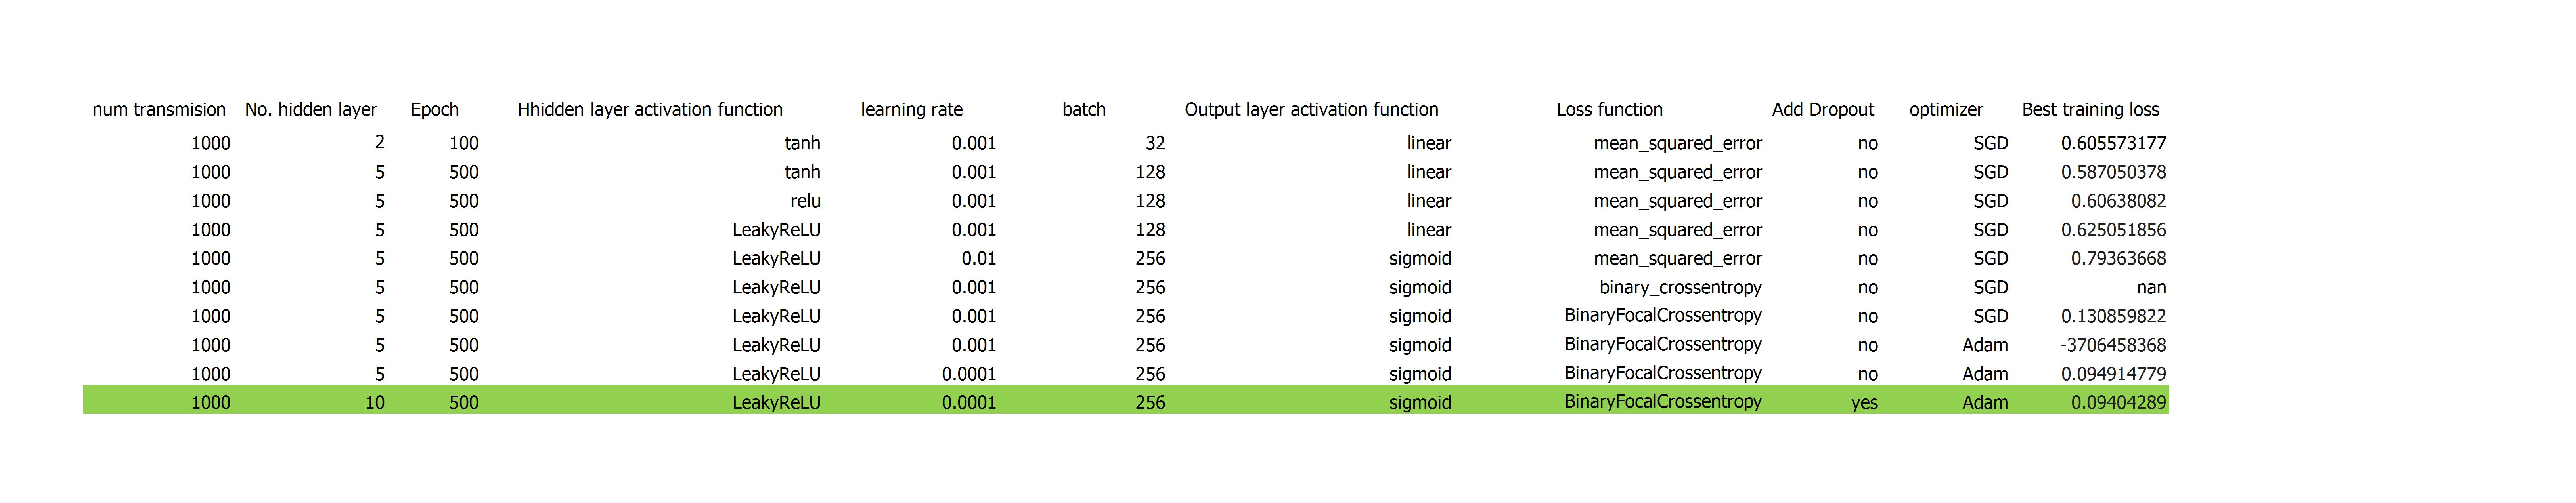

In [ ]:
import cv2
image = cv2. imread('/content/GG.jpg')
from google.colab.patches import cv2_imshow
cv2_imshow(image)
